In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

573

In [9]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [10]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cebb9ee3c72434ec855275efbbf1ca8f


In [11]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [12]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | san patricio
Processing Record 2 of Set 1 | atuona
Processing Record 3 of Set 1 | saint-philippe
Processing Record 4 of Set 1 | kamenskoye
City not found. Skipping...
Processing Record 5 of Set 1 | namatanai
Processing Record 6 of Set 1 | vila velha
Processing Record 7 of Set 1 | okhtyrka
Processing Record 8 of Set 1 | hambantota
Processing Record 9 of Set 1 | vaini
Processing Record 10 of Set 1 | te anau
Processing Record 11 of Set 1 | provideniya
Processing Record 12 of Set 1 | puerto ayora
Processing Record 13 of Set 1 | thompson
Processing Record 14 of Set 1 | east london
Processing Record 15 of Set 1 | saskylakh
Processing Record 16 of Set 1 | fortuna
Processing Record 17 of Set 1 | sohbatpur
Processing Record 18 of Set 1 | sao desiderio
Processing Record 19 of Set 1 | mahebourg
Processing Record 20 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 21 of Set 1 | abaza
Proc

City not found. Skipping...
Processing Record 36 of Set 4 | krasnaya gorka
Processing Record 37 of Set 4 | pisco
Processing Record 38 of Set 4 | nantucket
Processing Record 39 of Set 4 | pueblo bello
Processing Record 40 of Set 4 | santiago de maria
Processing Record 41 of Set 4 | guerrero negro
Processing Record 42 of Set 4 | ponta do sol
Processing Record 43 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 44 of Set 4 | cape canaveral
Processing Record 45 of Set 4 | isangel
Processing Record 46 of Set 4 | taoudenni
Processing Record 47 of Set 4 | carahue
Processing Record 48 of Set 4 | lasa
Processing Record 49 of Set 4 | isla mujeres
Processing Record 50 of Set 4 | harper
Processing Record 1 of Set 5 | afua
Processing Record 2 of Set 5 | souillac
Processing Record 3 of Set 5 | chokurdakh
Processing Record 4 of Set 5 | merauke
Processing Record 5 of Set 5 | ilulissat
Processing Record 6 of Set 5 | dingle
Processing Record 7 of Set 5 | mys shmidta
City not found. S

Processing Record 26 of Set 8 | kawambwa
Processing Record 27 of Set 8 | prince rupert
Processing Record 28 of Set 8 | nuuk
Processing Record 29 of Set 8 | sinkat
City not found. Skipping...
Processing Record 30 of Set 8 | road town
Processing Record 31 of Set 8 | talara
Processing Record 32 of Set 8 | pangnirtung
Processing Record 33 of Set 8 | chumphon
Processing Record 34 of Set 8 | nouadhibou
Processing Record 35 of Set 8 | izhma
Processing Record 36 of Set 8 | bend
Processing Record 37 of Set 8 | narsaq
Processing Record 38 of Set 8 | victor harbor
Processing Record 39 of Set 8 | poya
Processing Record 40 of Set 8 | chicama
Processing Record 41 of Set 8 | urusha
Processing Record 42 of Set 8 | athabasca
Processing Record 43 of Set 8 | fairbanks
Processing Record 44 of Set 8 | rorvik
Processing Record 45 of Set 8 | moose factory
Processing Record 46 of Set 8 | baghdad
Processing Record 47 of Set 8 | vila franca do campo
Processing Record 48 of Set 8 | pascagoula
Processing Record 4

Processing Record 13 of Set 12 | benjamin aceval
Processing Record 14 of Set 12 | dunedin
Processing Record 15 of Set 12 | seoul
Processing Record 16 of Set 12 | havre-saint-pierre
Processing Record 17 of Set 12 | krasnoarmeysk
Processing Record 18 of Set 12 | kumluca
Processing Record 19 of Set 12 | port hedland
Processing Record 20 of Set 12 | ilkal
Processing Record 21 of Set 12 | impfondo
Processing Record 22 of Set 12 | verkh-usugli
Processing Record 23 of Set 12 | santa margherita ligure
-----------------------------
Data Retrieval Complete      
-----------------------------


In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,San Patricio,28.02,-97.52,73.40,78,1,6.93,US,2020-11-26 00:50:30
1,Atuona,-9.80,-139.03,77.72,76,85,16.28,PF,2020-11-26 00:50:30
2,Saint-Philippe,-21.36,55.77,75.20,83,0,3.36,RE,2020-11-26 00:50:30
3,Namatanai,-3.67,152.43,86.05,63,55,6.93,PG,2020-11-26 00:50:30
4,Vila Velha,-20.33,-40.29,73.99,94,40,3.36,BR,2020-11-26 00:50:30
...,...,...,...,...,...,...,...,...,...
520,Port Hedland,-20.32,118.57,89.60,55,19,8.05,AU,2020-11-26 00:51:39
521,Ilkal,15.97,76.13,68.65,82,63,10.60,IN,2020-11-26 00:51:40
522,Impfondo,1.64,18.07,72.18,82,36,1.68,CG,2020-11-26 00:51:40
523,Verkh-Usugli,52.70,115.17,4.17,84,0,2.48,RU,2020-11-26 00:51:40


In [17]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,San Patricio,US,2020-11-26 00:50:30,28.02,-97.52,73.40,78,1,6.93
1,Atuona,PF,2020-11-26 00:50:30,-9.80,-139.03,77.72,76,85,16.28
2,Saint-Philippe,RE,2020-11-26 00:50:30,-21.36,55.77,75.20,83,0,3.36
3,Namatanai,PG,2020-11-26 00:50:30,-3.67,152.43,86.05,63,55,6.93
4,Vila Velha,BR,2020-11-26 00:50:30,-20.33,-40.29,73.99,94,40,3.36
...,...,...,...,...,...,...,...,...,...
520,Port Hedland,AU,2020-11-26 00:51:39,-20.32,118.57,89.60,55,19,8.05
521,Ilkal,IN,2020-11-26 00:51:40,15.97,76.13,68.65,82,63,10.60
522,Impfondo,CG,2020-11-26 00:51:40,1.64,18.07,72.18,82,36,1.68
523,Verkh-Usugli,RU,2020-11-26 00:51:40,52.70,115.17,4.17,84,0,2.48


In [19]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [20]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

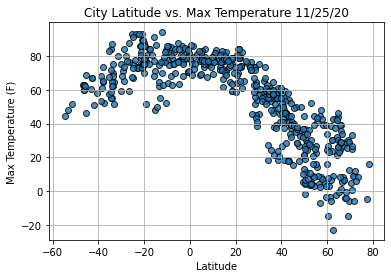

In [21]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

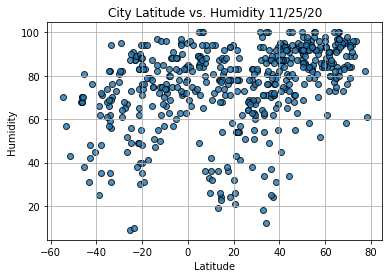

In [22]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

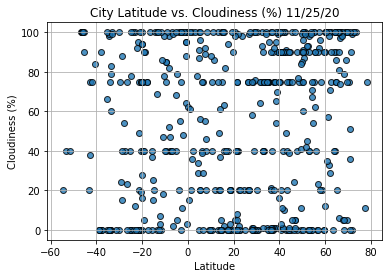

In [23]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

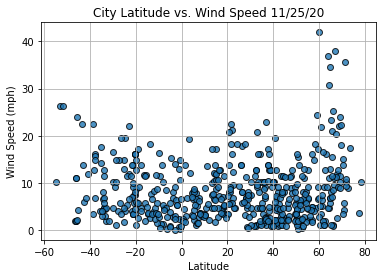

In [24]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()